# 直方圖等化 (Histogram Equalization)
影像的histogram指的是，在一張影像當中強度值統計分布，通常橫軸代表強度值，縱軸代表數量。histogram equalization，是一種利用影像的直方圖增強影像對比的方法。其概念如下圖(來自維基百科)

![histeq](https://upload.wikimedia.org/wikipedia/commons/c/ca/Histogrammeinebnung.png)

希望影像的強度值分布變得比較均勻。

## 數學理論
假設一張灰階影像${x}$，且令$n_i$為強度值$i$的數量，則在影像中一個像素出現強度值$i$的機率為

$$p_x(i)=\frac{n_i}{n}, 0 \leq i < L$$

其中$L$為強度值的總量(對於一般的8 bit影像為256)，$n$像素的總量，通常會將$i$的範圍normalize到$[0,1]$

定義$p_x$對應的累積分布(CDF)為

$$cdf_x(i)=\sum_{j=0}^{i}p_x(j)$$

我們希望創造一個轉換函數$k=T(i)$，使新的影像${p_y(k)}$有均勻的值方圖分布，相當於線性化影像的CDF，例如

$$cdf_y(k)=kC, \text{for some constant }C$$

由CDF的性質，則我們可以寫出以下的轉換關係

$$cdf_y(k)=cdf_y(T(i))=cdf_x(i)$$

假設 $p_y(k)=C=\frac{1}{i_{min}-i_{max}}$，則

$$T(i)=\frac{1}{C} \int_{i_{min}}^{i} p_x(i)di+\min(x) \text{ for } i_{min} \leq i \leq i_{max}$$

## 局部直方圖等化 (Local Histogram Equalization)
一般的直方圖等化是對整張影像做，通常新的直方圖只會是大概線性的CDF，因此後來有一種局部版本的直方圖等化，使CDF更加的線性。在scikit-image有實作此方法，範例如下：

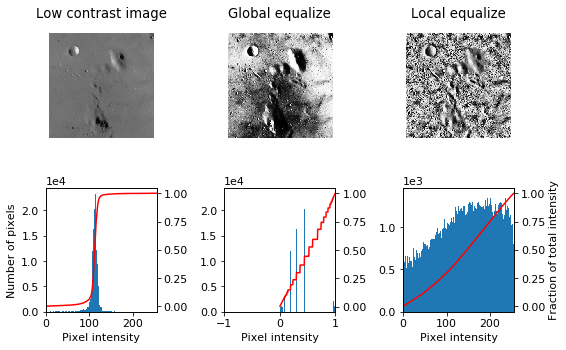

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 11

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 參考
[Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization)

[Local Histogram Equalization](http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html#sphx-glr-auto-examples-color-exposure-plot-local-equalize-py)